In [7]:
import requests
import json
import pandas as pd

## Ticketmaster trial

## Europe


In [6]:
# Setting API Key param
params = {'apikey':'LyJMmObKVt8HhwrliyabmorlCtma5iUt'}

# Pulling URIs for all country codes
uri_response = requests.get('https://app.ticketmaster.eu/mfxapi/v2', params=params)

# Extracting Europe URI
uri_response.json()

{'timestamp': '2025-05-07T02:15:04.427+00:00',
 'status': 404,
 'error': 'Not Found',
 'message': '',
 'path': '/v2'}

In [88]:
import requests

url = "https://app.ticketmaster.com/discovery/v2/events.json"
params = {
    "apikey": "ysAgZSGVFoGtFzXWLA8RsmimFTvBHPkH",
    'keyword':'Concert',
    "countryCode": "US",
    "page": 0
}

response = requests.get(url, params=params)
data = response.json()


In [ ]:
for event in data["_embedded"]["events"]:
  print(event.keys())

In [ ]:
for event in data.get("_embedded", {}).get("events", []):
    name = event.get("name", "N/A")
    start_time = event.get("dates", {}).get("start", {}).get("dateTime", "N/A")
    venue = event.get("_embedded", {}).get("venues", [{}])[0].get("name", "N/A")
    genre_name = event.get("classifications", [{}])[0].get("segment", {}).get("name", "N/A")
    price_info = event.get("priceRanges", [{}])[0]
    min_price = price_info.get("min", "N/A")
    max_price = price_info.get("max", "N/A")
    event_url = event.get("url", "N/A")


    print(f"{name} | {start_time} | {venue} | {genre_name} | ${min_price}-{max_price} | {event_url}")

In [78]:
totalPages = data.get("page", {}).get("totalPages", 0)
print(f"总共有 {totalPages} 页码")

总共有 2 页码


In [ ]:
# Setting API Key param
params = {'apikey':'4XrkbIMbr4gS3vG1qsFiZpDcXSbyAZni'}

# Pulling URIs for all country codes
uri_response = requests.get('https://app.ticketmaster.com/discovery-feed/v2/events', params=params)

# Extracting US URI
uri_response.json()

In [90]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/418_Ticketmaster'
data_path = f'{path}/EVENTS_RAW-US-8cac8d0f-c60f-46f5-a1a7-11173b34c741-2025-05-06_020855.csv'
data = read_csv(data_path)
data = pd.read_csv(data_path)

Mounted at /content/drive


In [92]:
data = pd.read_csv(data_path)

<ipython-input-92-51c2f0483b92>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [131]:
data['PRIMARY_EVENT_URL'][4]

'https://www.ticketmaster.com/cirque-du-soleil-o-las-vegas-nevada-05-10-2025/event/2E00610DF5A2535B'

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

In [137]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.headless = True
wd = webdriver.Chrome(options=chrome_options)

In [126]:
from pyvirtualdisplay import Display
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# 显示器模拟
display = Display(visible=0, size=(1024, 768))
display.start()

# Chrome 配置
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--no-sandbox")
chrome_options.binary_location = "/usr/bin/chromium-browser"

# ✅ 关键！driver 正确初始化
driver = webdriver.Chrome( options=chrome_options)


In [138]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait



wd.get('https://www.ticketmaster.com/summer-70s-soul-jam-temecula-california-07-11-2025/event/0A00627FC10C62C2')

wait = WebDriverWait(driver, 30)

price_elements = driver.find_elements(By.CSS_SELECTOR, 'li[data-price]')

prices = []
for el in price_elements:
    price_str = el.get_attribute('data-price')
    try:
        price = float(price_str.replace('$', '').strip())
        prices.append(price)
    except ValueError:
        continue


if prices:
    price_range = (min(prices), max(prices))
    print(f"Price range: ${price_range[0]:.2f} - ${price_range[1]:.2f}")
else:
    print("No prices found.")


driver.quit()

MaxRetryError: HTTPConnectionPool(host='localhost', port=47021): Max retries exceeded with url: /session/ea7ad0d2e87280566cb02f9f26494783/elements (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7ebcfa927d90>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [152]:
from pyvirtualdisplay import Display
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

display = Display(visible=0, size=(1024, 768))
display.start()

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.binary_location = "/usr/bin/chromium-browser"

driver = webdriver.Chrome(options=chrome_options)
wait = WebDriverWait(driver, 15)

# Step 3: 打开网页测试
driver.get("https://www.firefox.com")
print(driver.title)

# 记得退出
driver.quit()
display.stop()

Get Firefox for desktop — Mozilla (US)


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


display = Display(visible=0, size=(1024, 768))
display.start()

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.binary_location = "/usr/bin/chromium-browser"

driver = webdriver.Chrome(options=chrome_options)
wait = WebDriverWait(driver, 15)

driver.get('https://www.ticketmaster.com/beyonce-cowboy-carter-tour-inglewood-california-05-09-2025/event/0A00623FE20048D3')


html = driver.page_source
print(html[:2000])


driver.quit()

In [ ]:
# 找到价格输入框（用 aria-label 匹配更稳定）
price_input = driver.find_element(By.CSS_SELECTOR, 'input[aria-label^="Maximum price"]')

# 提取 min 和 max 属性
min_price = price_input.get_attribute('min')
max_price = price_input.get_attribute('max')

print(f"Min price: {min_price}, Max price: {max_price}")

prices = []
for el in price_elements:
    price_str = el.get_attribute('data-price')
    try:
        price = float(price_str.replace('$', '').strip())
        prices.append(price)
    except ValueError:
        continue



if prices:
    price_range = (min(prices), max(prices))
    print(f"Price range: ${price_range[0]:.2f} - ${price_range[1]:.2f}")
else:
    print("No prices found.")


driver.quit()

### EDA with 100 data

In [163]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/418_Ticketmaster'
data_path = f'{path}/price_ranges.csv'
price_range = pd.read_csv(data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
data.columns

Index(['EVENT_ID', 'EVENT_NAME', 'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 'EVENT_START_LOCAL_DATE',
       'EVENT_START_LOCAL_TIME', 'ONSALE_START_DATETIME',
       'ONSALE_END_DATETIME', 'CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE',
       'CLASSIFICATION_SUB_GENRE', 'EVENT_IMAGE_URL', 'MIN_PRICE', 'MAX_PRICE',
       'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 'VENUE_CITY',
       'VENUE_STATE_CODE', 'VENUE_COUNTRY_CODE', 'VENUE_LATITUDE',
       'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', 'ATTRACTION_URL',
       'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB

In [214]:
result = pd.merge(price_range, data, left_on = 'url',right_on = 'PRIMARY_EVENT_URL',how = 'inner')

In [215]:
result = result[['CLASSIFICATION_SEGMENT','VENUE_STATE_CODE','ATTRACTION_NAME','min_price','max_price']].dropna()

In [216]:
data_path_2 = f'{path}/price_ranges2.csv'
price_range_2 = pd.read_csv(data_path_2)
result_2 = pd.merge(price_range_2, data, left_on = 'url',right_on = 'PRIMARY_EVENT_URL',how = 'inner')
result_2 = result_2[['CLASSIFICATION_SEGMENT','VENUE_STATE_CODE','ATTRACTION_NAME','min_price','max_price']].dropna()
pre_data = pd.concat([result,result_2],axis = 0)

In [198]:
pre_data.columns

Index(['CLASSIFICATION_GENRE', 'VENUE_STATE_CODE', 'ATTRACTION_NAME',
       'min_price', 'max_price'],
      dtype='object')

In [256]:
data_path_3 = f'{path}/price_ranges3.csv'
price_range_3 = pd.read_csv(data_path_3)
result_3 = pd.merge(price_range_3, data, left_on = 'url',right_on = 'PRIMARY_EVENT_URL',how = 'inner')
result_3 = result_3[['CLASSIFICATION_GENRE','VENUE_STATE_CODE','ATTRACTION_NAME','min_price','max_price']].dropna()
pre_data = pd.concat([result,result_2,result_3],axis = 0)

In [258]:
new = pre_data.groupby('CLASSIFICATION_GENRE')['min_price'].mean()
new

,min_price
CLASSIFICATION_GENRE,
Alternative,153.857143
Baseball,75.725000
Circus & Specialty Acts,68.645000
Comedy,76.861250
Community/Civic,59.500000
Country,83.415000
Dance,39.800000
Dance/Electronic,57.070000
Family,71.695000


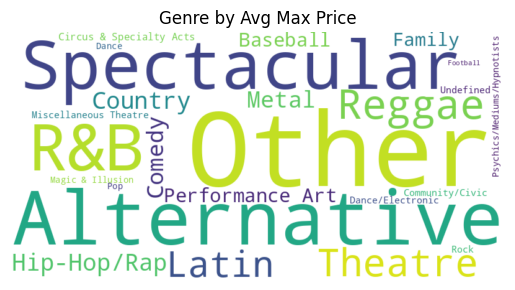

In [260]:
from wordcloud import WordCloud
text_weights = {k: v for k, v in zip(new.index, new.values)}
wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(text_weights)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Genre by Avg Max Price")
plt.show()

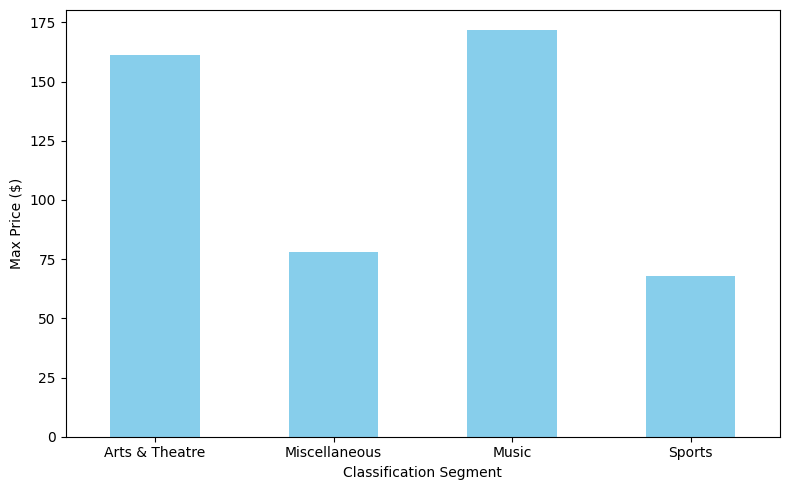

In [253]:
import matplotlib.pyplot as plt
new.plot.bar(figsize=(8, 5), legend=False,color = 'skyblue')
plt.ylabel("Max Price ($)")
plt.xlabel("Classification Segment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-pac

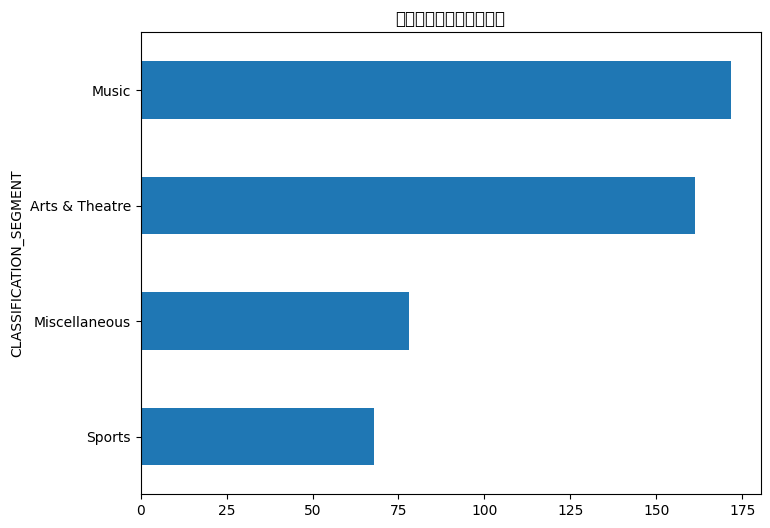

In [229]:
grouped = pre_data.groupby('CLASSIFICATION_SEGMENT')['max_price'].mean().sort_values()

# 画水平条形图
grouped.plot(kind='barh', figsize=(8, 6), title='平均最大票价（按分类）')
plt.xlabel("Average Max Price")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

In [ ]:
pre_data.groupby('VENUE_STATE_CODE')['max_price'].mean()

In [255]:
state_avg = pre_data.groupby('VENUE_STATE_CODE')['max_price'].mean().reset_index()
state_avg.columns = ['state', 'avg_min_price']
import plotly.express as px

fig = px.choropleth(
    state_avg,
    locations='state',              # 列名，必须是州缩写
    locationmode="USA-states",      # 告诉 Plotly 使用州缩写
    color='avg_min_price',          # 要着色的列
    scope="usa",                    # 只显示美国地图
    color_continuous_scale="Blues", # 颜色渐变方案，可改为 "Reds"、"Viridis" 等
    labels={'avg_min_price': 'Avg Min Price'}
)

fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(title_text="Min_Price - Group by States", geo=dict(showlakes=True))
fig.show()